# 1.4.4 Smoothing Images

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 2D Convolution (Image Filtering)

In [4]:
img = cv2.imread('./Image/opencv_logo.png')
kernel = np.ones((5,5),np.float32)/25

In [5]:
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

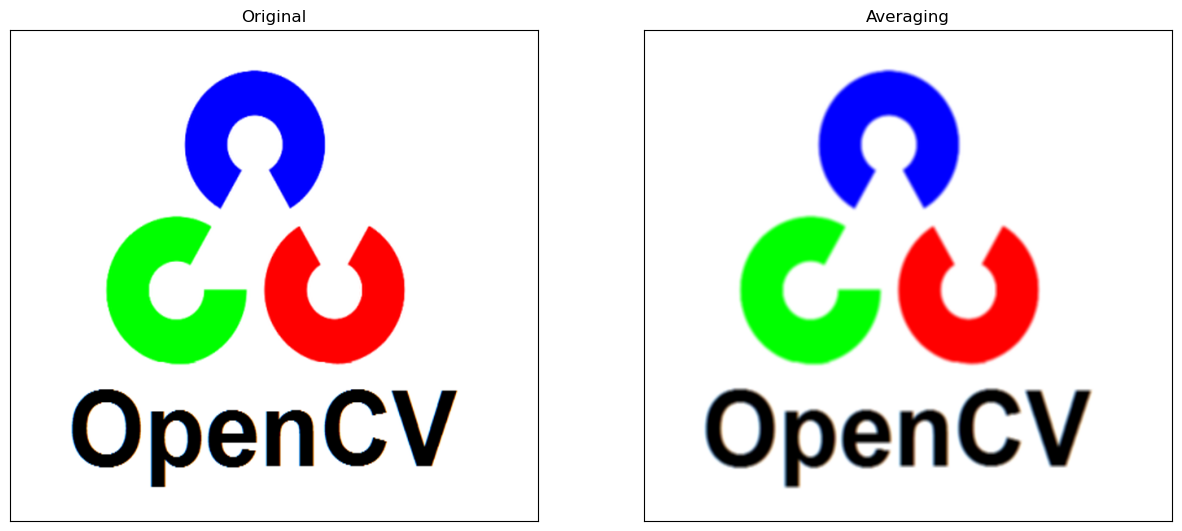

In [6]:
dst = cv2.filter2D(img,-1,kernel)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Image Blurring (Image Smoothing)

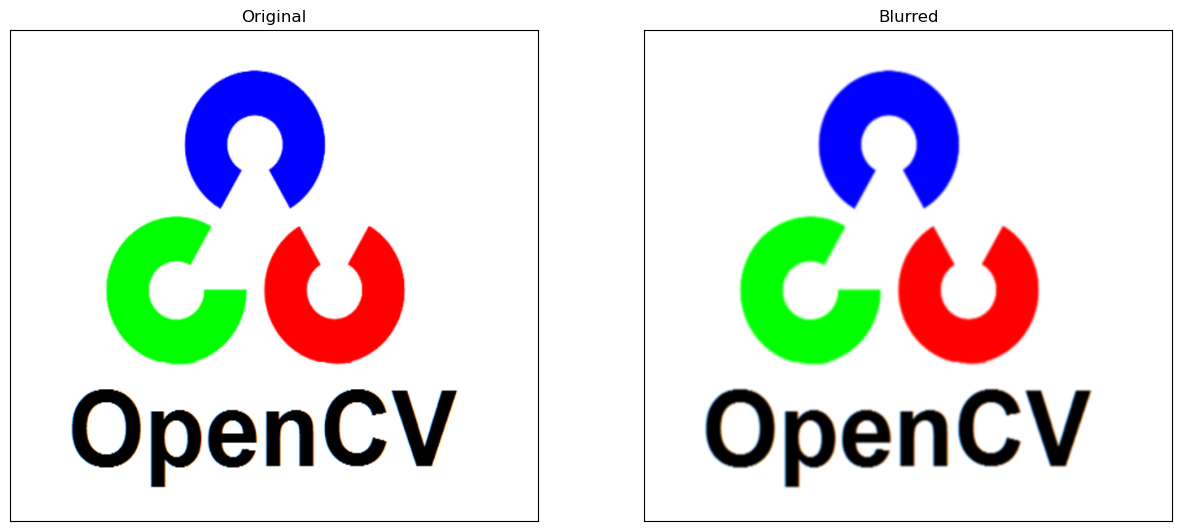

In [7]:
#blur = cv2.blur(img,(5,5))
blur = cv2.GaussianBlur(img,(5,5),0)
#blur = cv2.medianBlur(img,5)
#blur = cv2.bilateralFilter(img,9,75,75)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## Kernel Convolution

In [10]:
l=1
kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]],np.float32)

In [11]:
kernel

array([[ 0., -1.,  0.],
       [-1.,  4., -1.],
       [ 0., -1.,  0.]], dtype=float32)

In [12]:
img = np.random.randint(10, size=(12,12))
#img = np.ones((10,10),np.float32)

In [13]:
img

array([[1, 2, 0, 2, 2, 7, 8, 0, 7, 3, 7, 4],
       [8, 1, 4, 1, 5, 8, 0, 2, 2, 9, 7, 3],
       [0, 6, 2, 7, 0, 9, 0, 5, 4, 4, 5, 4],
       [1, 1, 8, 5, 5, 8, 7, 3, 1, 0, 9, 2],
       [1, 6, 7, 9, 9, 3, 1, 9, 8, 1, 2, 6],
       [8, 3, 6, 6, 8, 4, 1, 8, 8, 2, 3, 1],
       [1, 9, 5, 0, 8, 3, 9, 1, 4, 8, 5, 1],
       [4, 1, 0, 4, 9, 0, 1, 3, 5, 8, 2, 8],
       [7, 9, 2, 3, 4, 3, 7, 8, 4, 8, 7, 5],
       [0, 4, 5, 6, 2, 2, 9, 4, 3, 0, 2, 4],
       [2, 3, 4, 5, 4, 0, 2, 1, 4, 0, 2, 1],
       [8, 4, 3, 6, 8, 5, 6, 6, 7, 3, 6, 8]])

In [14]:
h,w=img.shape

In [15]:
print(h,w)

12 12


In [16]:
dst = np.zeros((h,w))

In [17]:
for i in range(l,h-l):
    for j in range(l,w-l):
        t=0
        for p in range(-l,l+1):
            for q in range(-l,l+1):
                t += kernel[p+l,q+l]*img[i+p,j+q]
        dst[i,j]=t        

In [18]:
img

array([[1, 2, 0, 2, 2, 7, 8, 0, 7, 3, 7, 4],
       [8, 1, 4, 1, 5, 8, 0, 2, 2, 9, 7, 3],
       [0, 6, 2, 7, 0, 9, 0, 5, 4, 4, 5, 4],
       [1, 1, 8, 5, 5, 8, 7, 3, 1, 0, 9, 2],
       [1, 6, 7, 9, 9, 3, 1, 9, 8, 1, 2, 6],
       [8, 3, 6, 6, 8, 4, 1, 8, 8, 2, 3, 1],
       [1, 9, 5, 0, 8, 3, 9, 1, 4, 8, 5, 1],
       [4, 1, 0, 4, 9, 0, 1, 3, 5, 8, 2, 8],
       [7, 9, 2, 3, 4, 3, 7, 8, 4, 8, 7, 5],
       [0, 4, 5, 6, 2, 2, 9, 4, 3, 0, 2, 4],
       [2, 3, 4, 5, 4, 0, 2, 1, 4, 0, 2, 1],
       [8, 4, 3, 6, 8, 5, 6, 6, 7, 3, 6, 8]])

In [19]:
np.set_printoptions(threshold=320, linewidth=320)

In [20]:
dst

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0., -16.,  12., -14.,   9.,  11., -18.,   1., -14.,  20.,   4.,   0.],
       [  0.,  20., -17.,  20., -26.,  20., -21.,  11.,   4.,  -2.,  -4.,   0.],
       [  0., -17.,  17.,  -9.,  -2.,   8.,  16., -10., -11., -15.,  27.,   0.],
       [  0.,  12.,  -1.,   9.,  11., -10., -16.,  16.,  13.,  -8., -11.,   0.],
       [  0., -17.,   3.,   1.,   5.,   1., -18.,  13.,  10., -12.,   2.,   0.],
       [  0.,  26.,   5., -23.,  12.,  -9.,  30., -20.,  -6.,  13.,   6.,   0.],
       [  0., -18., -12.,   4.,  20., -16., -15.,  -3.,   1.,   9., -20.,   0.],
       [  0.,  22.,  -9.,  -4.,  -1.,  -1.,   7.,  14.,  -8.,  13.,  11.,   0.],
       [  0.,  -1.,   4.,   9.,  -8.,  -6.,  21.,  -5.,   0., -13.,  -5.,   0.],
       [  0.,  -2.,   0.,   0.,   1., -13.,  -8., -12.,   5.,  -9.,  -1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [23]:
img = cv2.imread('./Image/lena.png', 0)

In [24]:
h,w=img.shape

In [25]:
dst = np.zeros((h-2*l,w-2*l),np.uint8)

In [26]:
for i in range(l,h-l):
    for j in range(l,w-l):
        t=0
        for p in range(-l,l+1):
            for q in range(-l,l+1):
                t += kernel[p+l,q+l]*img[i+p,j+q]
        dst[i-l,j-l]=t 

In [27]:
cv2.imshow('img',img)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()